# 1. Importing Libraries

In [35]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report,precision_recall_fscore_support, roc_auc_score, log_loss, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

0.12.2


# 2. Reading Dataset

In [55]:
# dataset kaggle link = https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention/data
data = pd.read_csv("dataset.csv")
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# 3. Exploratory Data Analysis

## Dataset Overview

In [3]:
data.shape

(4424, 35)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [5]:
pd.set_option('display.max_columns', None)
data.describe().round(3)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000
mean,1.179,6.887,1.728,9.899,0.891,2.531,1.255,12.322,16.455,7.318,7.819,0.548,0.012,0.114,0.881,0.352,0.248,23.265,0.025,0.710,6.271,8.299,4.707,10.641,0.138,0.542,6.232,8.063,4.436,10.230,0.150,11.566,1.228,0.002
std,0.606,5.299,1.314,4.332,0.312,3.964,1.748,9.026,11.045,3.998,4.857,0.498,0.107,0.317,0.324,0.478,0.432,7.588,0.156,2.361,2.480,4.179,3.094,4.844,0.691,1.919,2.196,3.948,3.015,5.211,0.754,2.664,1.383,2.270
min,1.000,1.000,0.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,17.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7.600,-0.800,-4.060
25%,1.000,1.000,1.000,6.000,1.000,1.000,1.000,2.000,3.000,5.000,5.000,0.000,0.000,0.000,1.000,0.000,0.000,19.000,0.000,0.000,5.000,6.000,3.000,11.000,0.000,0.000,5.000,6.000,2.000,10.750,0.000,9.400,0.300,-1.700
50%,1.000,8.000,1.000,10.000,1.000,1.000,1.000,13.000,14.000,6.000,8.000,1.000,0.000,0.000,1.000,0.000,0.000,20.000,0.000,0.000,6.000,8.000,5.000,12.286,0.000,0.000,6.000,8.000,5.000,12.200,0.000,11.100,1.400,0.320
75%,1.000,12.000,2.000,13.000,1.000,1.000,1.000,22.000,27.000,10.000,10.000,1.000,0.000,0.000,1.000,1.000,0.000,25.000,0.000,0.000,7.000,10.000,6.000,13.400,0.000,0.000,7.000,10.000,6.000,13.333,0.000,13.900,2.600,1.790
max,6.000,18.000,9.000,17.000,1.000,17.000,21.000,29.000,34.000,32.000,46.000,1.000,1.000,1.000,1.000,1.000,1.000,70.000,1.000,20.000,26.000,45.000,26.000,18.875,12.000,19.000,23.000,33.000,20.000,18.571,12.000,16.200,3.700,3.510


In [6]:
# check total null values
data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [7]:
# check if values duplicated
data.duplicated().sum()

0

In [56]:
data['Target'] = data['Target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})

## Target Distribution

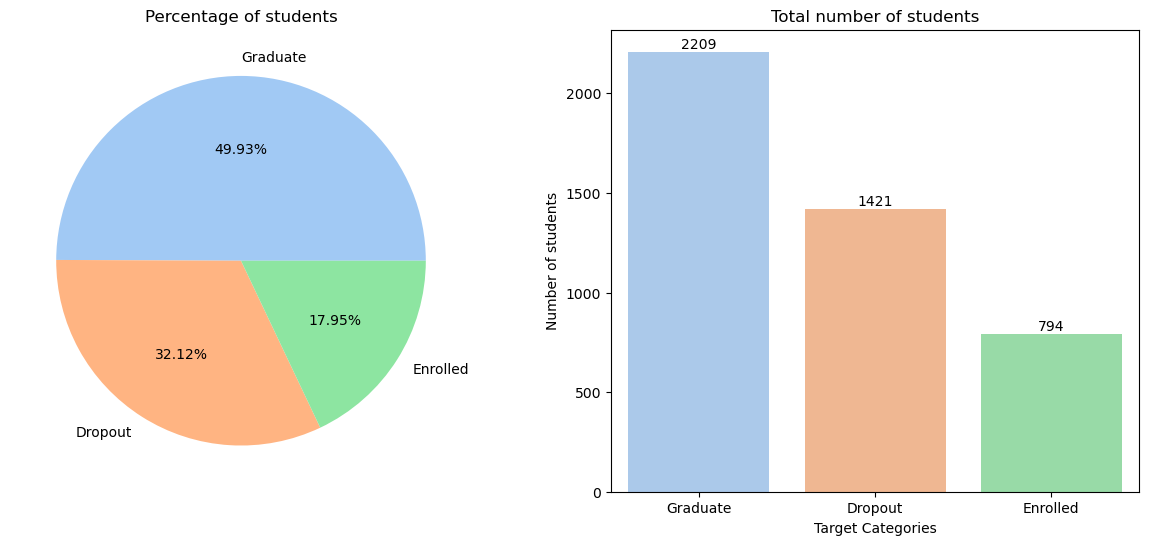

In [9]:
data_pie = data['Target'].value_counts()

label_mapping = {0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}
data_pie_labels = data_pie.index.map(label_mapping)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.pie(data_pie, labels=data_pie_labels, autopct="%.2f%%", colors=sns.color_palette('pastel'))
ax1.set_title('Percentage of students')

ax2 = sns.barplot(x=data_pie_labels, y=data_pie.values, palette="pastel")
ax2.set(xlabel='Target Categories', ylabel='Number of students')
ax2.set_title('Total number of students')
ax2.bar_label(container=ax2.containers[0], labels=data_pie.values, fontsize=10, color='black')

plt.show()

### Gender

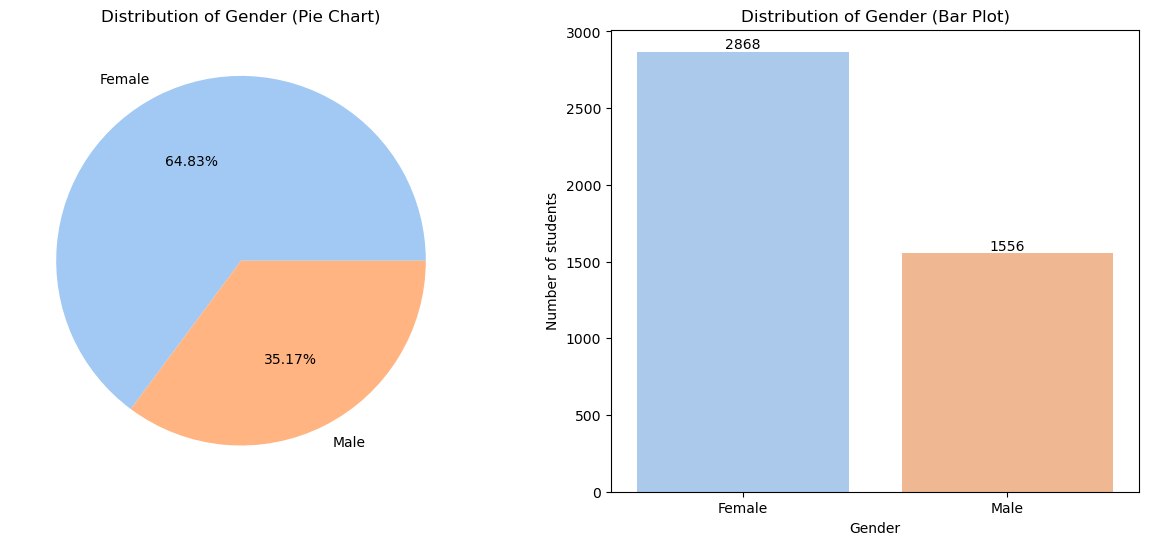

In [10]:
data_gender = data['Gender'].value_counts()

gender_mapping = {0: 'Female', 1: 'Male'}
data_gender_labels = data_gender.index.map(gender_mapping)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.pie(data_gender, labels=data_gender_labels, autopct="%.2f%%", colors=sns.color_palette('pastel'))
ax1.set_title('Distribution of Gender (Pie Chart)')

ax2 = sns.barplot(x=data_gender_labels, y=data_gender.values, palette="pastel")
ax2.set(xlabel='Gender', ylabel='Number of students')
ax2.set_title('Distribution of Gender (Bar Plot)')

ax2.bar_label(container=ax2.containers[0], labels=data_gender.values, fontsize=10, color='black')

plt.show()

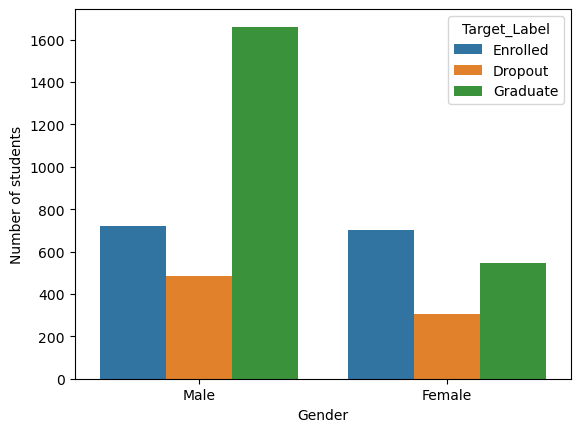

In [11]:
target_labels = {0: 'Enrolled', 1: 'Dropout', 2: 'Graduate'}
data['Target_Label'] = data['Target'].map(target_labels)

sns.countplot(data=data, x='Gender', hue='Target_Label', order=[0, 1], hue_order=['Enrolled', 'Dropout', 'Graduate'])
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.ylabel('Number of students')
plt.show()

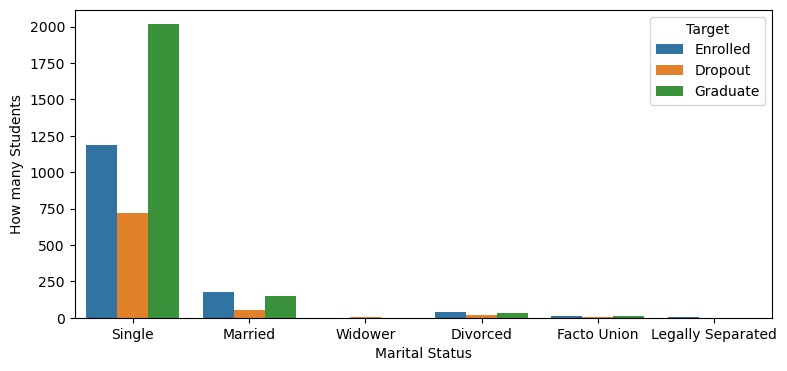

In [12]:
plt.figure(figsize=(9, 4))

sns.countplot(data=data, x='Marital status', hue='Target')

plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['Single', 'Married', 'Widower', 'Divorced', 'Facto Union', 'Legally Separated'])
plt.xlabel('Marital Status')
plt.ylabel('How many Students')

target_labels = ['Enrolled', 'Dropout', 'Graduate']
plt.legend(title='Target', labels=target_labels)

plt.show()


## Box Plot

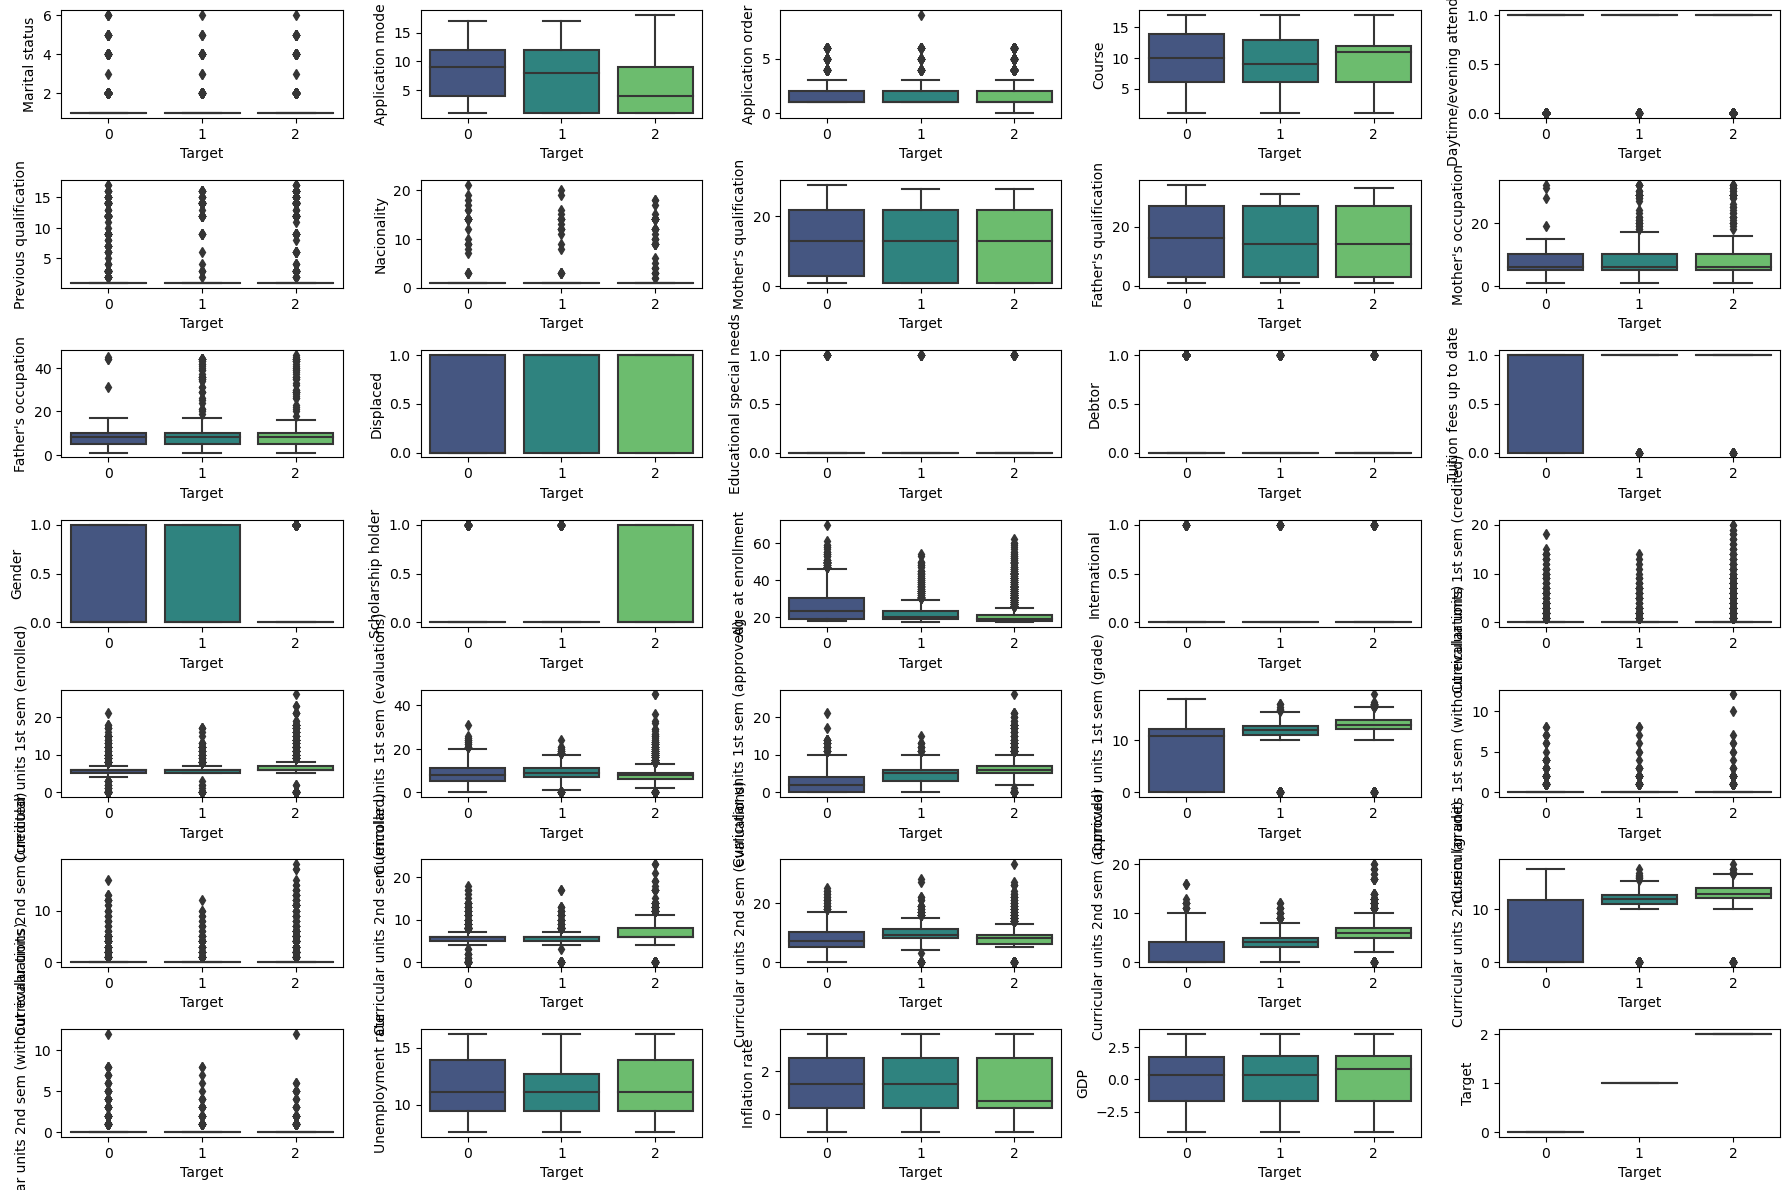

In [13]:
# Box Plot for each feature with respect to the target
plt.figure(figsize=(18, 12))
gs = GridSpec(7, 5)

for i, col in enumerate(data.columns[:-1]):
    ax = plt.subplot(gs[i])
    sns.boxplot(x='Target', y=col, data=data, palette='viridis')
    ax.set_xlabel('Target', fontsize=10)
    ax.set_ylabel(col, fontsize=10)

plt.tight_layout()
plt.show()


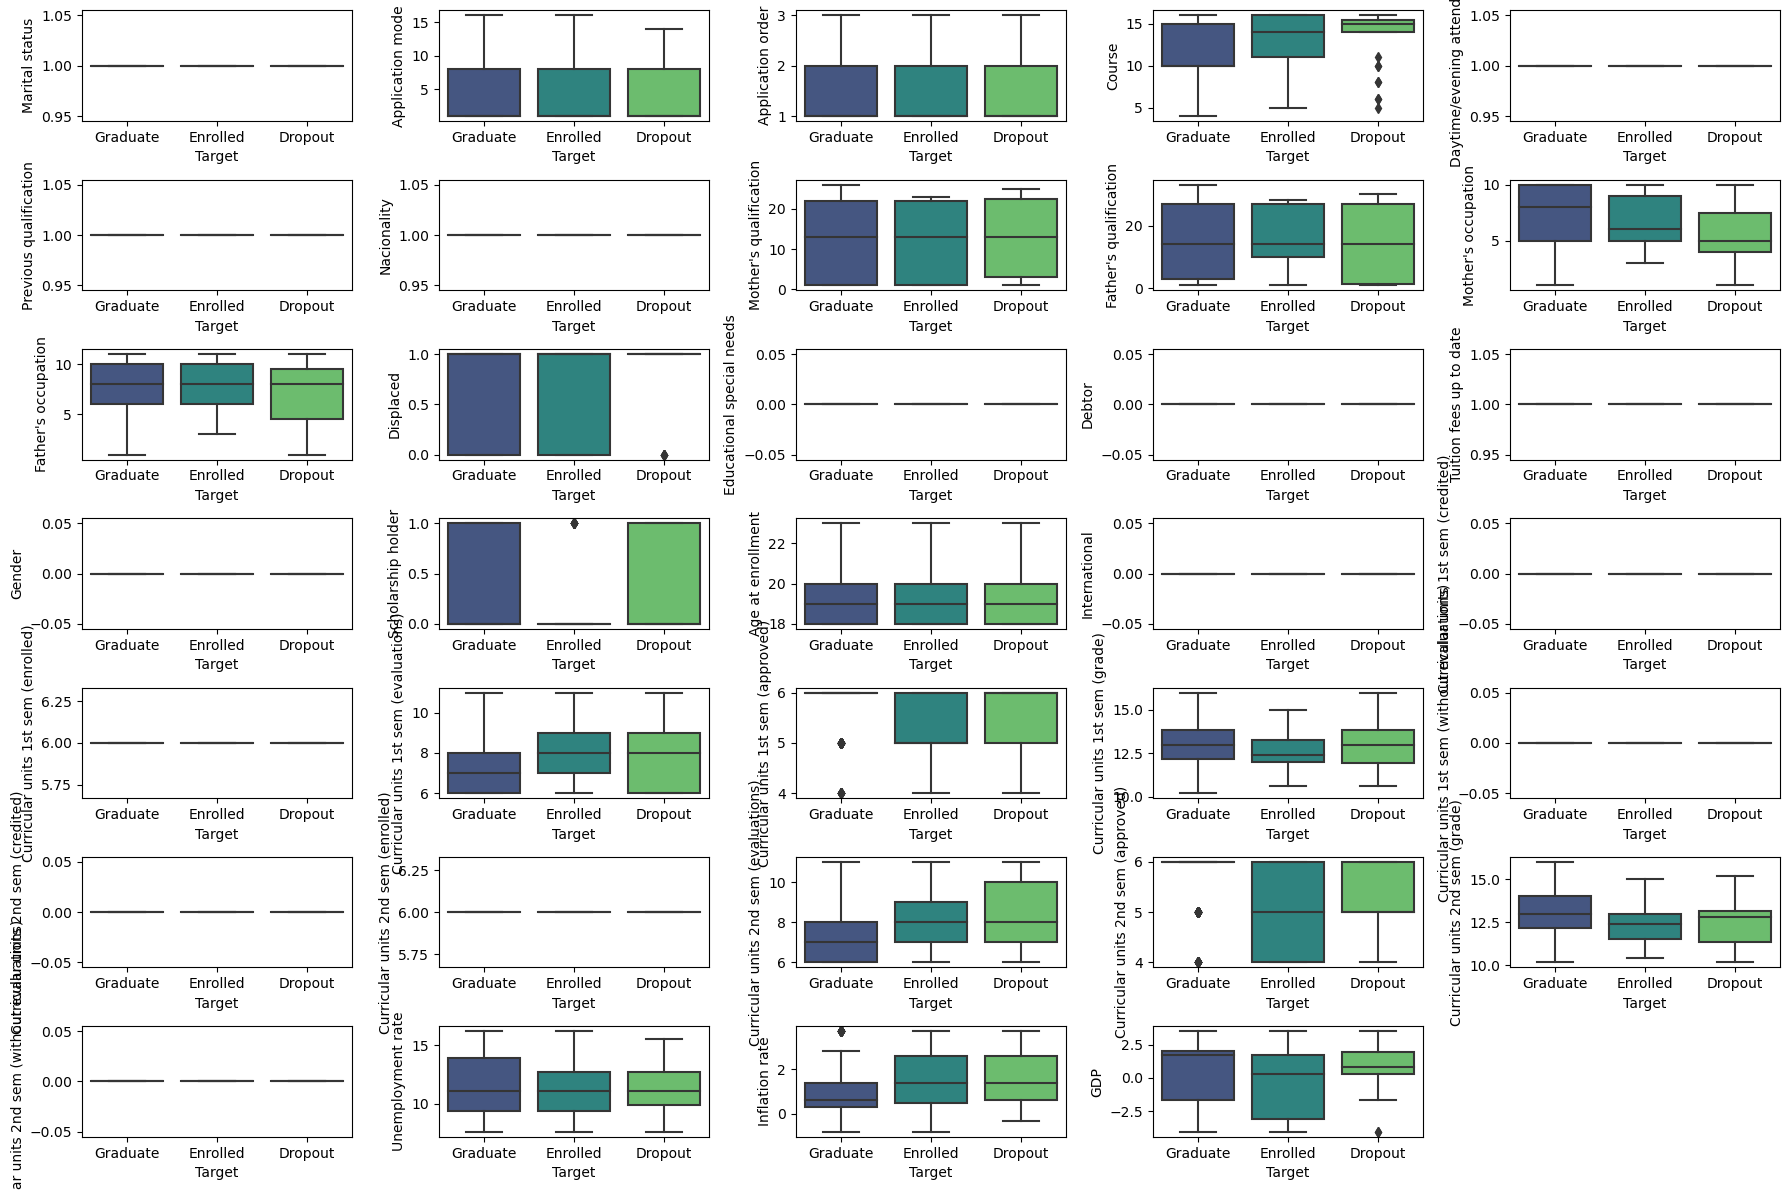

In [73]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

for col in data.columns[:-1]:
    data = remove_outliers_iqr(data, col)

plt.figure(figsize=(18, 12))
gs = GridSpec(7, 5)

for i, col in enumerate(data.columns[:-1]):
    ax = plt.subplot(gs[i])
    sns.boxplot(x='Target', y=col, data=data, palette='viridis')
    ax.set_xlabel('Target', fontsize=10)
    ax.set_ylabel(col, fontsize=10)

plt.tight_layout()
plt.show()

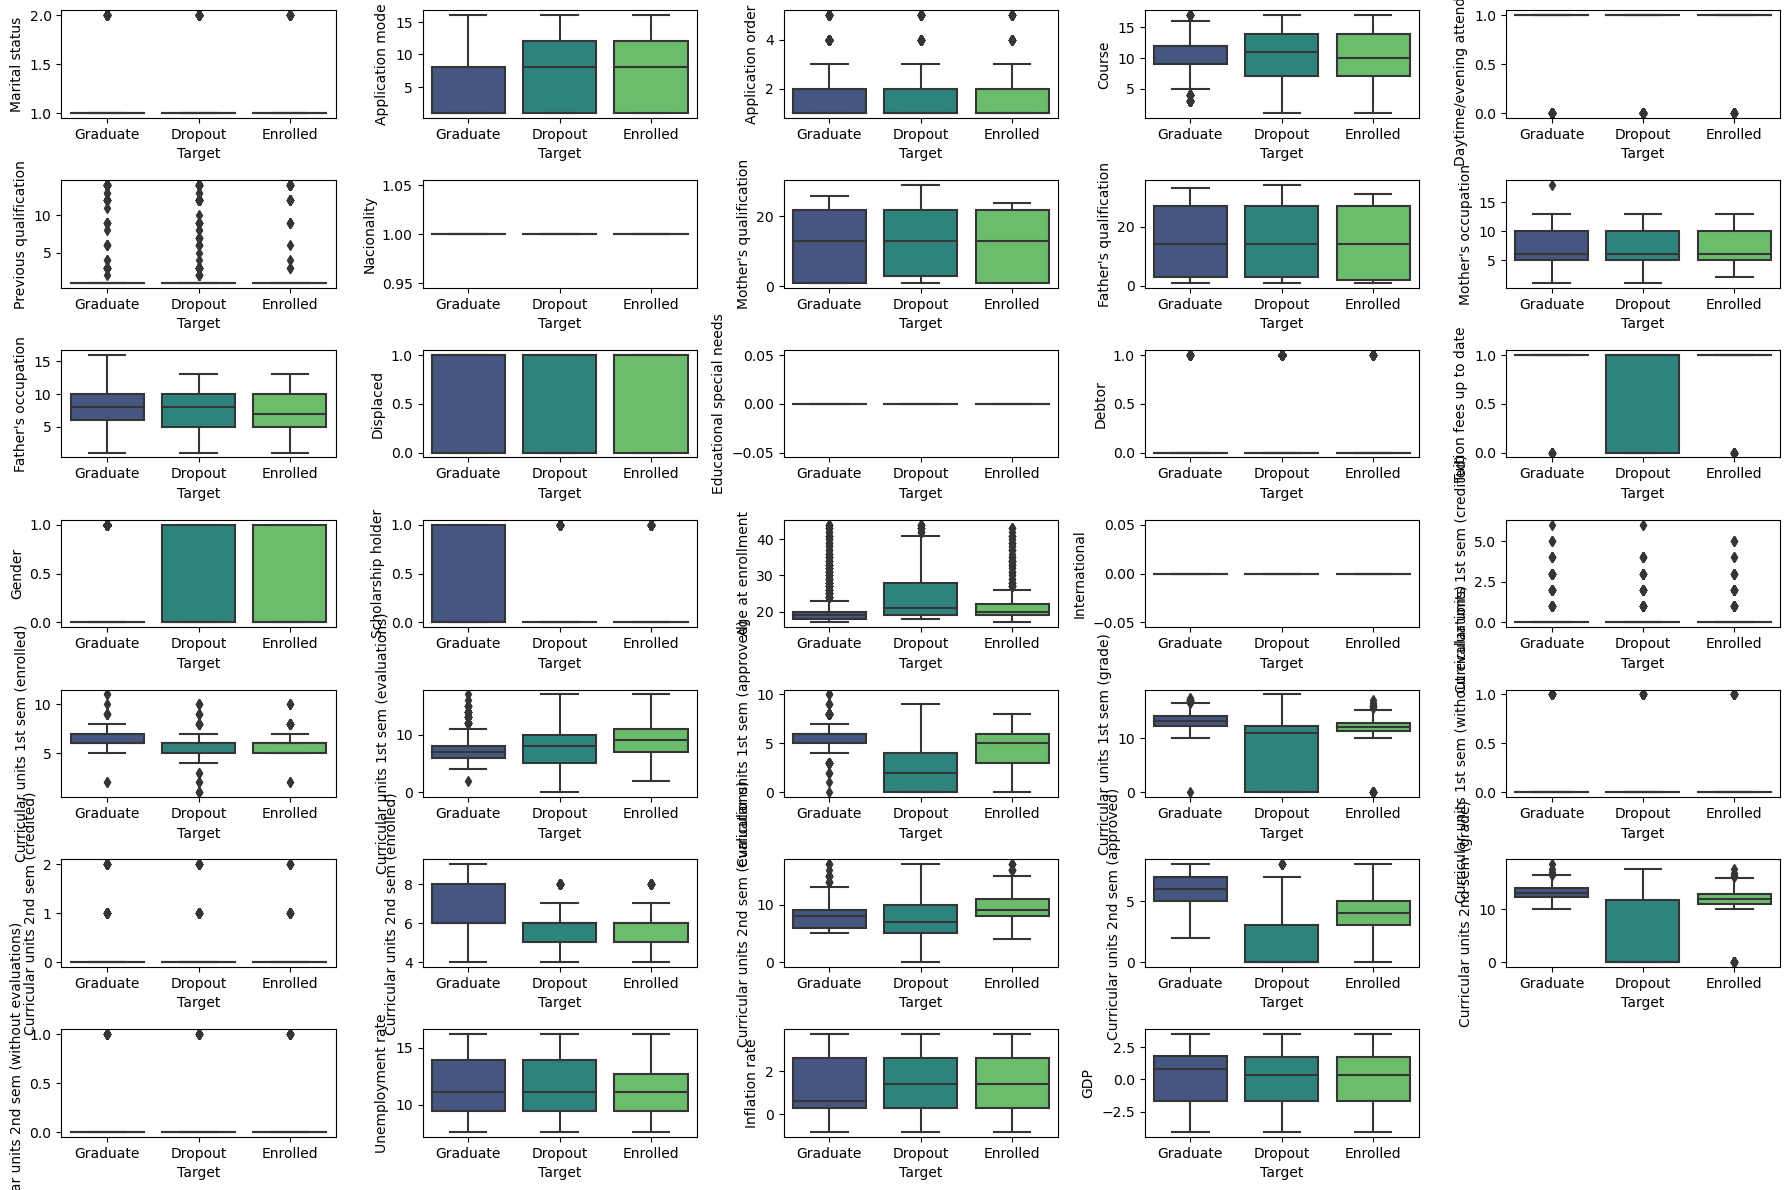

In [68]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from matplotlib.gridspec import GridSpec
# from scipy.stats import zscore

# # Load the dataset
# data = pd.read_csv("dataset.csv")

# # Function to remove outliers using Z-score
# def remove_outliers_zscore(df, column):
#     z_scores = zscore(df[column])
#     df_filtered = df[(z_scores >= -3) & (z_scores <= 3)]  # Adjust the threshold as needed
#     return df_filtered

# # Remove outliers for each feature using Z-score
# for col in data.columns[:-1]:
#     data = remove_outliers_zscore(data, col)

# # Box Plot for each feature after removing outliers using Z-score
# plt.figure(figsize=(18, 12))
# gs = GridSpec(7, 5)

# for i, col in enumerate(data.columns[:-1]):
#     ax = plt.subplot(gs[i])
#     sns.boxplot(x='Target', y=col, data=data, palette='viridis')
#     ax.set_xlabel('Target', fontsize=10)
#     ax.set_ylabel(col, fontsize=10)

# plt.tight_layout()
# plt.show()


In [69]:
data.shape

(3122, 35)

## Histogram

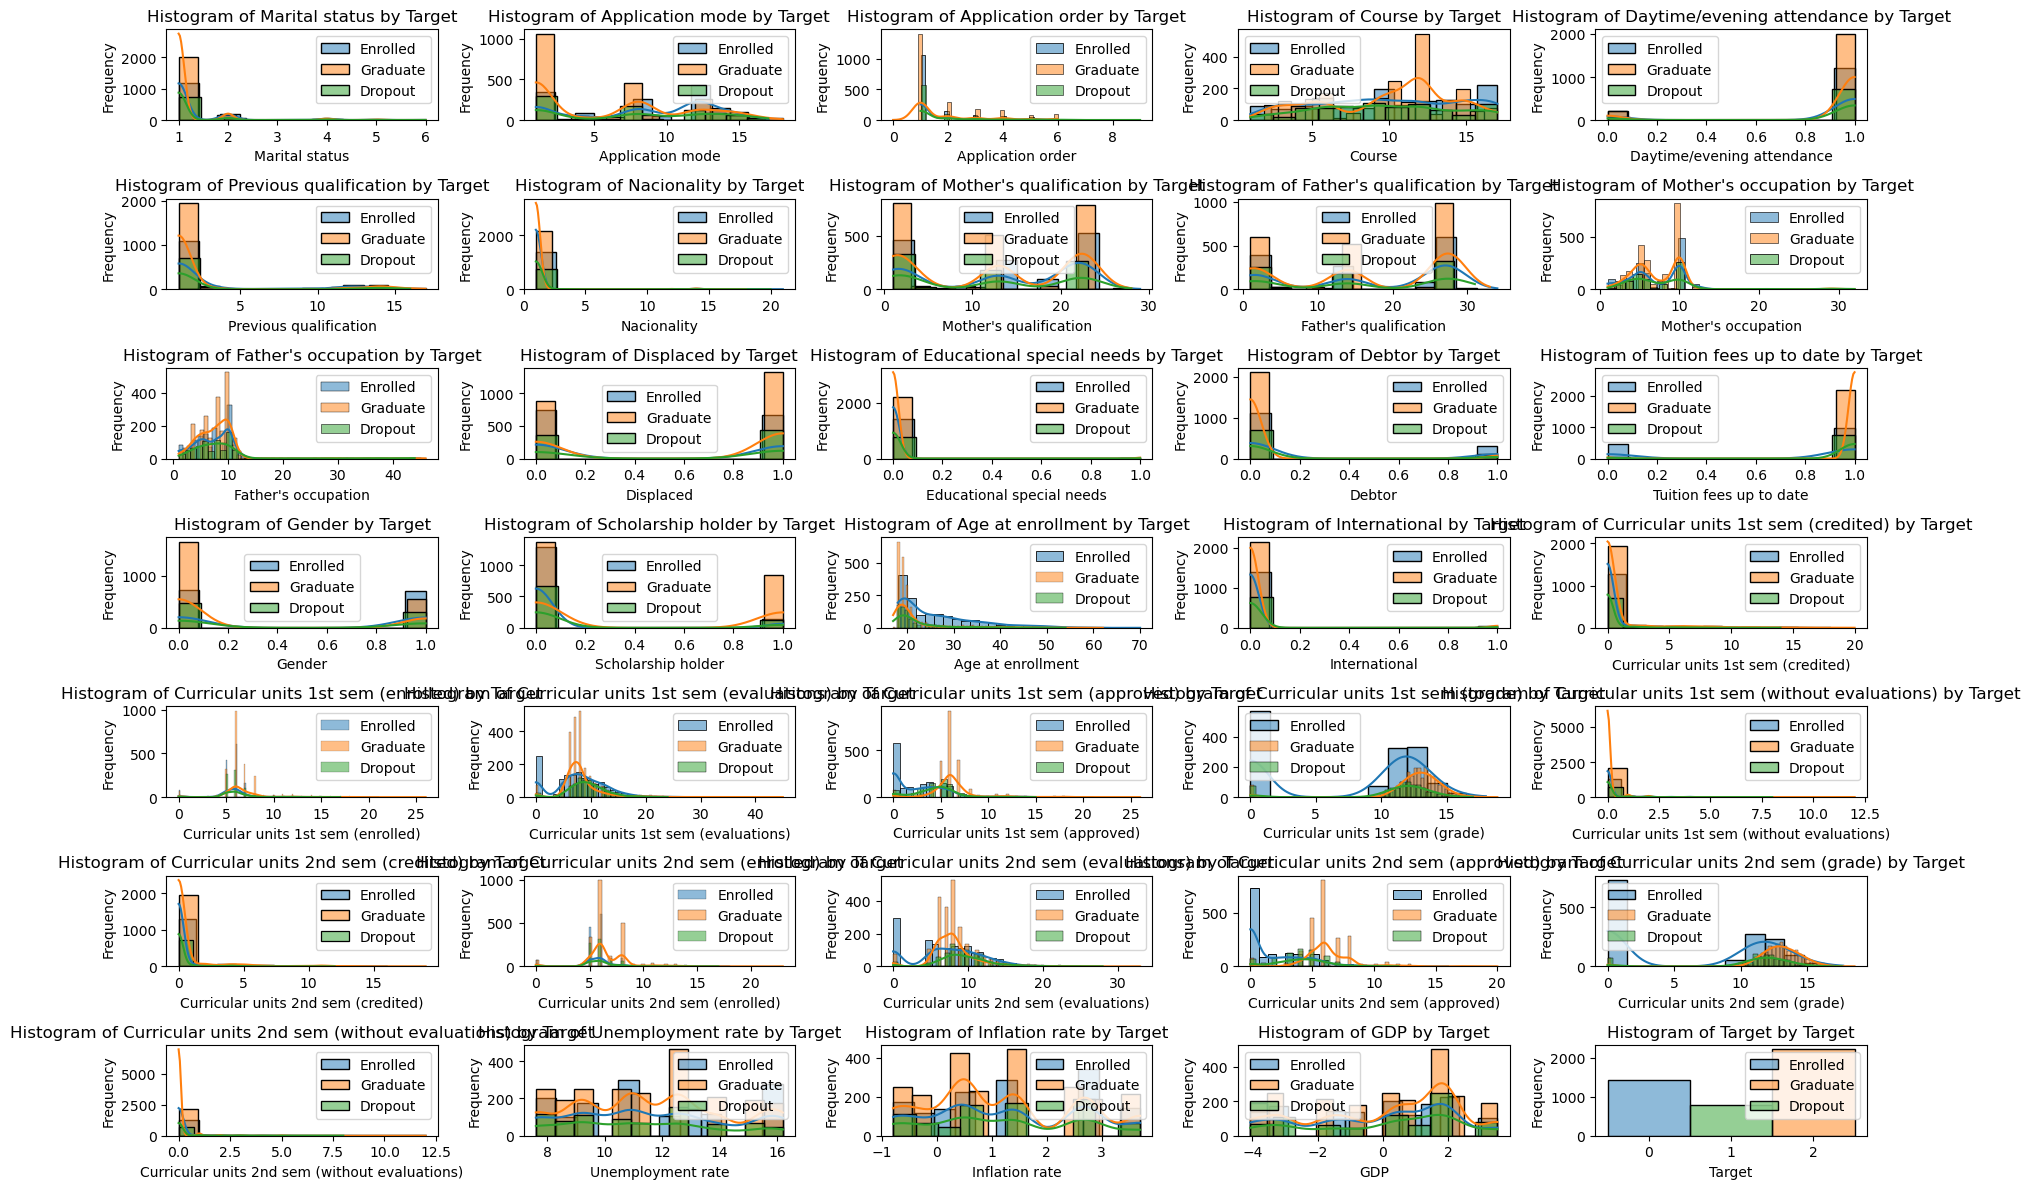

In [14]:
plt.figure(figsize=(18, 12))
gs = GridSpec(7, 5)
target_names = {0: 'Enrolled', 1: 'Dropout', 2: 'Graduate'}

for i, col in enumerate(data.columns[:-1]):
    ax = plt.subplot(gs[i])
    for target_value in data['Target'].unique():
        sns.histplot(data[data['Target'] == target_value][col], kde=True, label=target_names[target_value], ax=ax)
    ax.set_title(f'Histogram of {col} by Target', fontsize=12)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.legend()

plt.tight_layout()
plt.show()


## Pair Plot

In [ ]:
sns.set(style="ticks")
sns.pairplot(data, hue="Target", palette="Set1", diag_kind="kde", markers=["o", "s", "D"])

plt.suptitle('Pair Plot of Features by Target', y=1.02, fontsize=16)
plt.show()

## Heatmap Correlation

In [ ]:
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr() , annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

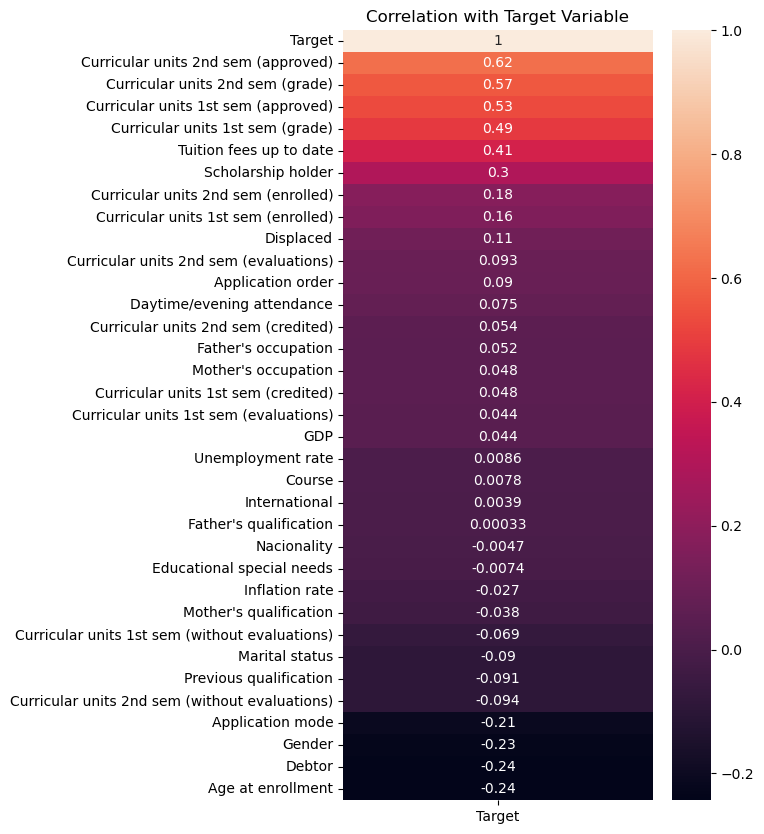

In [42]:
data_2 = pd.read_csv("dataset.csv")

data_2.replace("Dropout",0,inplace=True)
data_2.replace("Enrolled",1,inplace=True)
data_2.replace("Graduate",2,inplace=True)


plt.figure(figsize = (5,10))
sns.heatmap(data_2.corr()[['Target']].sort_values(by='Target', ascending=False), annot = True)
plt.title('Correlation with Target Variable')
plt.show()

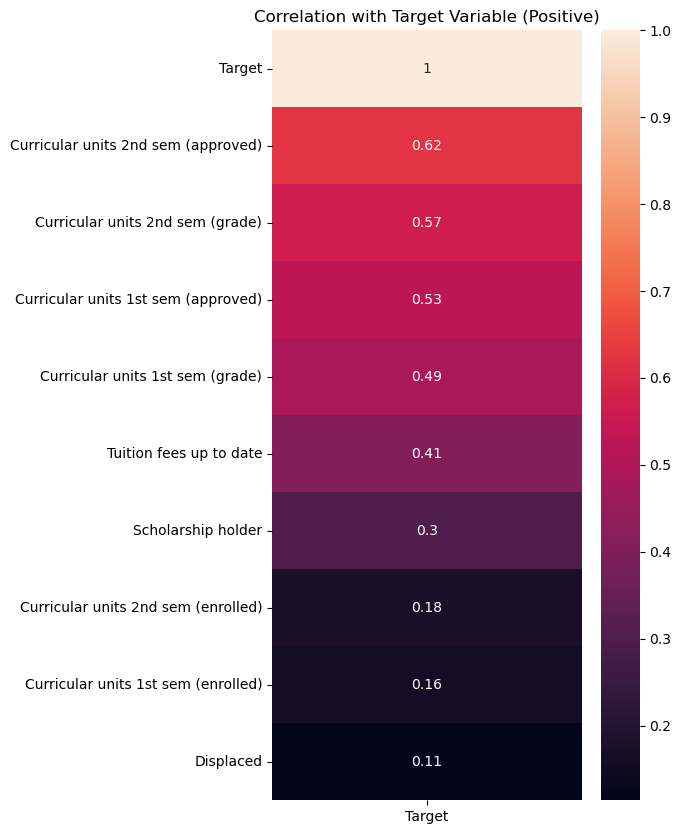

In [64]:
data_2 = data.copy()

data_2.replace("Dropout", 0, inplace=True)
data_2.replace("Enrolled", 1, inplace=True)
data_2.replace("Graduate", 2, inplace=True)

correlation_matrix = data_2.corr()

positive_correlation_features = correlation_matrix['Target'][correlation_matrix['Target'] > 0.1].index

data = data_2[positive_correlation_features]

plt.figure(figsize=(5, 10))
sns.heatmap(data.corr()[['Target']].sort_values(by='Target', ascending=False), annot=True)
plt.title('Correlation with Target Variable (Positive)')
plt.show()


In [65]:
data.shape

(4424, 10)

# 4. Data Preprocessing

In [59]:
X = data.drop('Target', axis=1)
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Model Selection and Training

## 1-  K-Nearest Neighbors

Accuracy: 70.85%


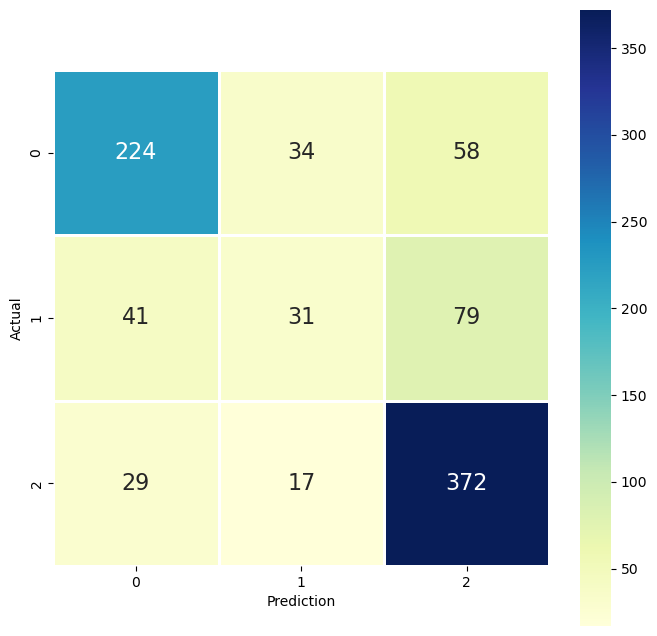

In [60]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, fmt=".0f", cmap="YlGnBu", linewidth=1, square=True, annot=True, annot_kws={"fontsize": 16}, ax=ax)

ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()

## 2- Logistic Regression

## 3- Decision Tree

## 4- Random Forest

## 5- SVM

## 6- Gradient Boosting

# 6. Hyperparameter Tuning:

# 7. Model Evaluation and Comparison

In [70]:

# Define the algorithms
algorithms = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('SVM', SVC(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]

# Initialize a dataframe to store results
results_df = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'Precision', 'Recall', 'F1'])

results_list = []

# Iterate through each algorithm
for algorithm_name, algorithm in algorithms:
    # Fit the model
    algorithm.fit(X_train, y_train)
    
    # Make predictions
    y_pred = algorithm.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    
    # Append results to the list
    results_list.append({
        'Algorithm': algorithm_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1
    })



In [71]:
results_df = pd.DataFrame(results_list)

results_df = results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

results_df

,Algorithm,Accuracy,Precision,Recall,F1
0,SVM,0.754802,0.745680,0.754802,0.740171
1,Random Forest,0.749153,0.735782,0.749153,0.737250
2,Gradient Boosting,0.744633,0.730752,0.744633,0.732768
3,Logistic Regression,0.740113,0.714853,0.740113,0.719756
4,K-Nearest Neighbors,0.708475,0.681741,0.708475,0.686713
5,Decision Tree,0.700565,0.702744,0.700565,0.700947
